# ML Assignment 4
**Group 10** <br>
Karthik Poomalraj (201791888) <br>
Bhavanishankar TR (201893188)

## Description of the code

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


train_set = sio.loadmat('train_32x32.mat')
test_set = sio.loadmat('test_32x32.mat')

1. Importing all the required libraries
2. Loading the SVHN dataset into train and test sets.

In [5]:
train_images, train_labels = train_set['X'], train_set['y']
test_images, test_labels = test_set['X'], test_set['y']
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
print("train_images shape: ", train_images.shape)
train_images, train_labels = train_images.transpose((3,0,1,2)), train_labels[:,0]
test_images, test_labels = test_images.transpose((3,0,1,2)), test_labels[:,0]
print("train_images shape after reshaping", train_images.shape)

train_images shape:  (32, 32, 3, 73257)
train_images shape after reshaping (73257, 32, 32, 3)


1. The training and test data with **instances X and labels y** are stored in seperate variables
2. For the assigned labels class names are allocated for the sake of plotting
3. The shape of the images in the dataset are reformatted to be recognizable by the neural network

In [6]:
train_labels[train_labels==10]=0
test_labels[test_labels==10]=0

train_images = train_images / 255.0

test_images = test_images / 255.0

1. The train and test labels with label names when detecting the number **10** are renamed to **0**
2. As  a part of data pre-processing, since the pixel values range from 0 to 255 we scale them to a range of 0 to 1 before feeding it to the neural network.

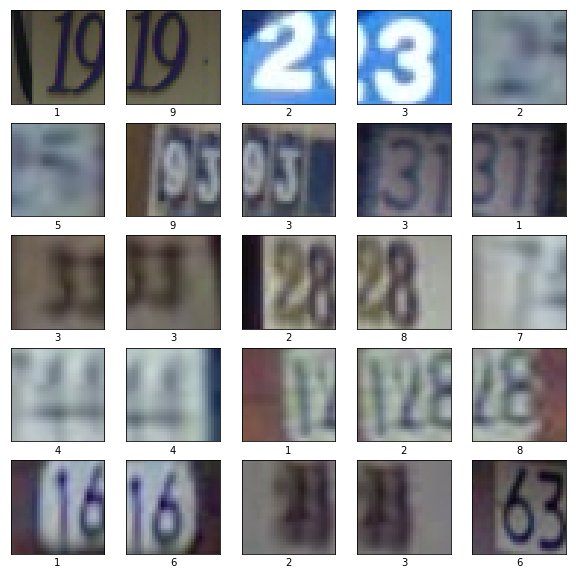

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i,:,:,:], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

#### The first 25 images along with their class labels are plotted to analyze the data set. <br> <br>

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Conv2D(64, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64, (2,2), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=6)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/6
73257/73257 [==============================] - 562s 8ms/sample - loss: 1.4911 - acc: 0.4856
Epoch 2/6
73257/73257 [==============================] - 531s 7ms/sample - loss: 0.5433 - acc: 0.8341
Epoch 3/6
73257/73257 [==============================] - 506s 7ms/sample - loss: 0.4444 - acc: 0.8626
Epoch 4/6
73257/73257 [==============================] - 508s 7ms/sample - loss: 0.4058 - acc: 0.8747
Epoch 5/6
73257/73257 [==============================] - 517s 7ms/sample - loss: 0.3768 - acc: 0.8831
Epoch 6/6
26032/26032 [==============================] - 82s 3ms/sample - loss: 0.3358 - acc: 0.9009
Test accuracy: 0.9008528


# Description of the model chosen

1. We make use of tensorflow Keras library for our neural network.
2. The sequential neural network model chosen constitutes **six** Keras layers

## Layer 1 (Input layer)

1. Type of network: **Convolutional 2D**
2. Number of units: **128**
3. Kernel size: **3 x 3**
4. Activation function used: **relu**
5. Input shape: **32 x 32 x 3**

**Description:** 
The first layer is a Convolutional 2D network with **128 units (nodes)** and a kernal of size **3x3** matrix. Activation function used is **"relu"** (rectified linear unit) which scales the values from a minimum of 0 to higher values. The input shape is (32, 32, 3) which is the shape (32 rows, 32 columns, RGB) of the 3D images fed into the neural network

## Layer 2 (Hidden layer)

1. Type of network: **Convolutional 2D**
2. Number of units: **64**
3. Kernel size: **3 x 3**
4. Activation function used: **relu**
5. Max pooling applied: **Yes** Pool size: **2 x 2**
6. Type of regularization: **Dropout** Drop rate: **0.25**

**Description:** 
We are making use of convolutional 2D hidden layer in order to detect one specific pattern in the image with a kernel of size 3x3 matrix. We apply max pooling to this layer in order to down-sample the image, reducing the dimensionality such that more assumptions can be made about the underlying features. Precisely max pooling takes a filter, size 2x2 in our case, applies it to our input image of 32x32 and outputs the maximum number in the output matrix. This process helps in reducing the number of parameters or weights, consequently reducing the computational cost. It also prevents **overfitting** as the model generalizes well to higher level details in the image.
  The type of regularization used is **Dropout**, this method trains an ensemble consisting of subnetworks that can be constructed by removing non ouput units from base networks. The dropout rate we've chosen for this layer is **0.25**, such that during forward propagation 25% of the inputs are set to 0 in this layer.

## Layer 3 (Hidden layer)

1. Type of network: **Convolutional 2D**
2. Number of units: **64**
3. Kernel size: **2 x 2**
4. Activation function used: **relu**
5. Max pooling applied: **Yes** Pool size: **2 x 2**
6. Type of regularization: **Dropout** Drop rate: **0.5**

**Description:**
This layer is similar to the previous hidden layer. It will detect another pattern in the image with the kernel of size 2x2.

## Layer 4 (Hidden layer)

1. Type of network: **Convolutional 2D**
2. Number of units: **64**
3. Kernel size: **2 x 2**
4. Activation function used: **relu**
5. Max pooling applied: **No**
6. Type of regularization: **Dropout** Drop rate: **0.2**

**Description:**
Another convolution layer to detect deeper patterns, Maxpooling wasn't applied in this layer to avoid shrinking the image such that the patterns are still recognizable.

## Layer 5 (Hidden layer)

1. Type of network: **Dense fully connected**
2. Number of units: **128**
3. Activation function used: **relu**
4. Type of regularization: **None**

**Description:**
The outputs of layer 4 are flattened and input to layer 5. We make use of a fully connected layer with 128 nodes in order to recognize sparsely placed segments of the input. 

## Layer 6 (Output layer)

1. Type of network: **Dense fully connected**
2. Number of units: **10**
3. Activation function used: **softmax**

**Description:**
The output layer classifies the image according to the number detected and outputs the label. The number of units are 10 for detecting 0 to 9 labels.

# Description of network trained

### Optimizer: Adam

Adam optimizer is an extension to the traditional stochastic gradient descent. Unlike the traditional SGD approach that maintains a single learning rate for all the wight updates, the ADAM maintains a per parameter training rate that are also adapted based on average of recent magnitudes of the gradients of the weight, which consequently improves performance. [https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/]

### Loss function: sparse_categorical_crossentropy

We make use of sparse_categorical_crossentropy since our output responses are integers and mutually exclusive, i.e., each sample belongs to exactly one class.

### Peformance metrics: Accuracy

We evaluate accuracy of the training dataset, i.e, number of correctly classified / missclassified samples.

### Number of epoch's: 7

We were getting a fair accuracy of around 87% in the 5th epoch, we tried if the accuracy improves by increasing the epochs. We observed that the training accuracy wasn't going beynd 90% after 7th epoch, hence chose 7 epochs.




In [9]:
predictions = model.predict(test_images)
print(predictions[201])
print(np.argmax(predictions[201]))
print(test_labels[201])

[5.0457491e-04 1.1906073e-03 7.7154928e-01 4.8116837e-03 6.5779204e-05
 3.2060748e-04 6.2986124e-05 2.1863584e-01 4.5988254e-05 2.8125211e-03]
2
2


We are predicting the classification of the test data set.

We have randomly chosen 201th sample and checked its classification. Also, checked the probability/confidence of classification for the sample which was correlated with the original classification label. 

We can observe that the index 2 of the array had higher activation than others, hence classified the image as **2**

In [10]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



Two functions are defined to plot the images and their classification performance graphically. <br>
The **plot_image function** checks if the predicted label of the sample is true, it will be represented with a blue color for true and red for missclassification alongside percentage of confidence with original classification label. <br>

The **plot_value_array** function plots the confidence of prediction denoted by blue bar for correctly classified images and red bar for missclassified images.

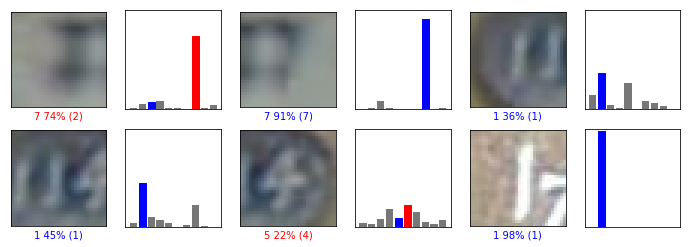

In [21]:
j = 0
plt.figure(figsize=(12,4))
for i in range(239,245):
    plt.subplot(2,6,2*j+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(2,6,2*j+2)
    plot_value_array(i, predictions,  test_labels)
    j += 1
plt.show()

### We are plotting the classification performance of 6 images chosen randomly.

## Short justification of why the architecture was selected:

We have chosen this architecture after a lot of trial and errors. Our initial network consisted of only 2 Convolutional layers and 2 Dense layers, We have not obtained satisfactory training and test performance. We wanted to optimize the loss function as well as improve the training accuracy. We then decided to go with more number of convolutional layers. We have tweaked around the number of nodes and regularization methods and decided to go ahead with higher depth and smaller width for convolutional hidden layers, and dropout as the regularization scheme. 

The final performance metrics obtained seemed to be better than the architectures tested before: <br>
Training Accuracy: 88.88% <br>
Loss: 0.3590
<br> <br>
Test accuracy: 90.09% <br>
Loss: 0.3358.

In [22]:
model.save("my_model.h5")

Now the model is saved in the local directory of the notebook.